In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from spectral import *
import numpy as np
import PIL
import sympy as sp
from mpmath import *
import matplotlib
import matplotlib.pyplot as plt

In [3]:
img = aviris.open('hawaii_sc01.raw')

In [4]:
img

	Data Source:   './hawaii_sc01.raw'
	# Rows:            512
	# Samples:         614
	# Bands:           224
	Interleave:        BIP
	Quantization:  16 bits
	Data format:     int16

In [5]:
arr = img.load()

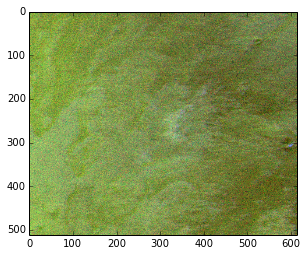

In [6]:
view = imshow(img, (1,2,200))


In [7]:
block = []
for i in range(224):
    data = arr[:40,:40,i].astype(np.float32)*10000 
    block.append(data)
print "process complete"

process complete


In [8]:
corr = []
for i in range(223):
    cor = np.corrcoef(block[i].reshape(-1), block[i+1].reshape(-1))[0][1]
    corr.append(cor)
print "process complete"

process complete


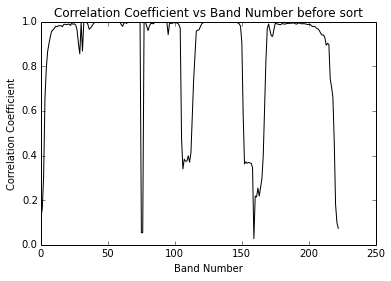

In [9]:
plt.figure(1)
plt.plot(range(0,223),corr, 'k')
plt.xlabel('Band Number')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficient vs Band Number before sort')
plt.show()
#Correlation ended

In [10]:
#greedy ordering algorithm
#rblock = [] # reference block, Contains the randome selectd block
#block1 = [] #Contains all the remaining blocks
#Ref = 25  #Reference block number, First block under consideration
#rblock.append(block[Ref])
#for i in range(40):
#    if i != Ref:
#        blocki = block[i]
#        block1.append(blocki)
#print('Process Complete')

In [11]:
#refblock = rblock[0]
#corgoa = []
#for i in range(39):
#    corr2 = np.corrcoef(refblock.reshape(-1), block1[i].reshape(-1))[0][1]
#    corgoa.append(corr2)
#print corgoa
#indexi = corgoa.index(max(corgoa))
#rblock.append(block1[indexi])
#rblock
haha = corr.index(min(corr))
print haha

159


In [12]:
#greedy ordering algorithm
rblock = [] #reference block
block1 = [] #all blocks
block1 = block
rindex = [] #contains all index
ifin = []
ifin1 = []


rindex.append(haha)
rblock.append(block1[haha])

for gh in range(len(block)):
        ifin.append(gh) #ifin will conatin the number od indices
        
for jk in range(224): 
    corgoa = [] #conatins correlation of greedy ordering algorithm
    Ref = rindex[jk] #Ref will contain the last rindex    
    block1.pop(Ref) #Removes that index from the block
    yoyo = ifin.pop(Ref) # saves it to a temp variable yoyo
    ifin1.append(yoyo) #ifin1 will conatin the final rearranged indexes
    for ijk in range(len(block1)):
        corr2 = np.corrcoef(rblock[jk].reshape(-1), block1[ijk].reshape(-1))[0][1] #calculate correlation coefficient with respect to the reference block
        corgoa.append(corr2)
    if len(corgoa) !=0:
        indexi = corgoa.index(max(corgoa)) #indexi will contain the index of maximum correlation w.r.t to the rblock
        rblock.append(block1[indexi]) #add the corresponding block to the rblock
        rindex.append(indexi) 
    del(corgoa)
    del(Ref)
print "Process Complete"

Process Complete


In [13]:
corrfin = []
for i in range(223):
    corfin = np.corrcoef(rblock[i].reshape(-1), rblock[i+1].reshape(-1))[0][1]
    corrfin.append(corfin)
print "process complete"

process complete


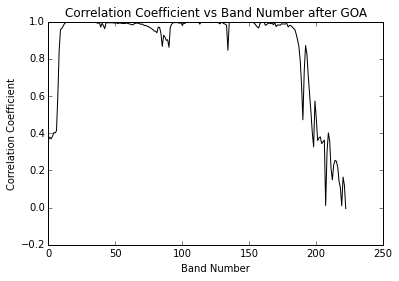

In [14]:
plt.figure(12)
plt.plot(range(0,223),corrfin, 'k')
plt.xlabel('Band Number')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficient vs Band Number after GOA')
plt.show()

In [15]:
from sklearn.preprocessing import normalize

In [16]:
#normalizing each block
rblockn = []
for q in range(len(rblock)):
    xc = rblock[q]
    xv = normalize(xc)
    rblockn.append(xv)
print 'Process Complete'

Process Complete


In [17]:
def snake(arr):
    a = arr
    xx = []
    yx = 1
    for i in range(5):
        zz = []
        for j in range(5):
            x = a[i][j]
            zz.append(x)
        if yx==-1:
            zz.reverse
        xx.extend(zz)
        yx = yx * -1
        del zz
    return xx

In [18]:
#imagescanning
finlist = []
for i in range(224):
    rblockyo = rblockn[i]
    xx = rblockyo[:5,:5]
    yy = snake(xx)
    finlist = finlist + yy

In [19]:
len(finlist)

5600

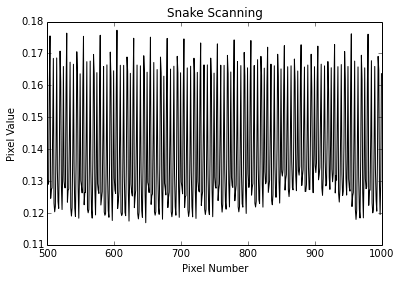

In [20]:
plt.figure(15)
plt.plot(range(500,1000),finlist[500:1000], 'k')
plt.xlabel('Pixel Number')
plt.ylabel('Pixel Value')
plt.title('Snake Scanning')
plt.show()

In [21]:
import heapq
from collections import defaultdict

In [22]:
def encode(frequency):
    heap = [[weight, [symbol, '']] for symbol, weight in frequency.items()]
    heapq.heapify(heap)
    while len(heap) > 1:
        lo = heapq.heappop(heap)
        hi = heapq.heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heapq.heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])
    return sorted(heapq.heappop(heap)[1:], key=lambda p: (len(p[-1]), p))

In [23]:
def huffall(y):
    finli = map (lambda x: finlist[y*x:(x+1)*y], range (5600/y)) 
    huffcode = []
    lenhuff = []
    for sym in finli:
        frequency = defaultdict(int)
        for symbol in sym:
            frequency[symbol] += 1

        huff = encode(frequency)
        #print "Symbol".ljust(10) + "Weight".ljust(10) + "Huffman Code"
        for p in huff:
            x = str(p[1])
            ya = x.lstrip('0')
            lenyz = len(ya)
            #print  p[0] , str(frequency[p[0]]).ljust(10) , ya
            lenhuff.append(lenyz)
            huffcode.append(p[1])
        del frequency
    print 'process complete'
    print "The length of Huffcode", len(huffcode)
    cr = float(5600*16)/sum(lenhuff)
    print "The compression ratio for frame size", y, "is", cr

In [24]:
for i in range(5,30,5):
    huffall(i)
    print "_"*10

process complete
The length of Huffcode 4948
The compression ratio for frame size 5 is 10.6590530573
__________
process complete
The length of Huffcode 4945
The compression ratio for frame size 10 is 6.98417647517
__________
process complete
The length of Huffcode 4944
The compression ratio for frame size 15 is 5.86272328731
__________
process complete
The length of Huffcode 4945
The compression ratio for frame size 20 is 5.12234164189
__________
process complete
The length of Huffcode 4941
The compression ratio for frame size 25 is 4.59652182835
__________


In [25]:
frequency = defaultdict(int)
for symbol in finlist:
    frequency[symbol] += 1

huff = encode(frequency)
#print "Symbol".ljust(10) + "Weight".ljust(10) + "Huffman Code"
huffcode = []
lenhuff = []
for p in huff:
    x = str(p[1])
    ya = x.lstrip('0')
    lenyz = len(ya)
    #print  p[0] , str(frequency[p[0]]).ljust(10) , ya
    lenhuff.append(lenyz)
    huffcode.append(p[1])
print "process complete"

process complete


In [26]:
len(huffcode)

4939

In [27]:
cr = float(5600*16)/sum(lenhuff)
print cr

1.54845845431
